In [1]:
import numpy as np
import pandas as pd 

In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

import glob
import cv2
import os
 
test = pd.read_csv("/kaggle/input/mldl-competition-1/test.csv")
train = pd.read_csv("/kaggle/input/mldl-competition-1/train.csv")
sampleSabmission = pd.read_csv("/kaggle/input/mldl-competition-1/sampleSubmission.csv")

In [3]:
train.head(3)


,Id,X,Y,Z,Time
0,1,2481900,528800,586,1.299872
1,2,2488400,530200,11686,1.679518
2,3,2495000,518400,6386,1.952326


In [4]:
test.head(3)

,Id,X,Y,Z
0,1,2488500,511100,11286
1,2,2471600,529600,2386
2,3,2483100,521300,10986


In [5]:
sampleSabmission.head(3)

,Id,Predicted
0,1,0
1,2,0
2,3,0


In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.1.0-rc0


In [7]:
column_names = ['Id' 'X','Y','Z','Time']
X_train_orig = train[["X", "Y", "Z"]]
X_test_orig  = test[["X", "Y", "Z"]]
Y_train_orig = train["Time"]
print(X_train_orig.shape)
print(X_test_orig.shape)
print(Y_train_orig.shape)


(1086557, 3)
(1086558, 3)
(1086557,)


Let us now scale the data. We will use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn library.

The transformation is given by:

> X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 

> X_scaled = X_std * (max - min) + min

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
scaler.fit(X_train_orig)
print("Maximum values of X_train (X, Y, Z): " + str(scaler.data_max_))
print("Minimum values of X_train (X, Y, Z): " + str(scaler.data_min_))

# Use the same transform for both train and test data:
X_train_norm = scaler.transform(X_train_orig)
X_test_norm = scaler.transform(X_test_orig)

# The inverse transform is also possible
#X_train_inv_orig = scaler.inverse_transform(X_train_norm)

#print(X_train)
#print(X_train_norm)
#print(X_train_orig - X_train)


Maximum values of X_train (X, Y, Z): [2496500.  530500.   12986.]
Minimum values of X_train (X, Y, Z): [ 2.469e+06  5.010e+05 -2.140e+02]


In [9]:
from sklearn.model_selection import train_test_split
# create training and testing vars

X_train, X_val, y_train, y_val = train_test_split(X_train_norm, Y_train_orig, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(869245, 3)
(869245,)
(217312, 3)
(217312,)


In [10]:
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=3, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation="linear")
])

print(model.summary())
 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 1,293
Trainable params: 1,293
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Train on 869245 samples, validate on 217312 samples
Epoch 1/5
869245/869245 [==============================] - 94s 108us/sample - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 1.2112e-04 - val_accuracy: 0.0000e+00
Epoch 2/5
869245/869245 [==============================] - 93s 106us/sample - loss: 1.2304e-04 - accuracy: 0.0000e+00 - val_loss: 8.7007e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
869245/869245 [==============================] - 92s 105us/sample - loss: 9.6066e-05 - accuracy: 0.0000e+00 - val_loss: 6.7648e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
869245/869245 [==============================] - 92s 105us/sample - loss: 6.5713e-05 - accuracy: 0.0000e+00 - val_loss: 9.0464e-05 - val_accuracy: 0.0000e+00


In [13]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 9.046360441121283e-05

Test accuracy: 0.0


In [14]:
print('\nhistory dict:', history.history.keys())


history dict: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


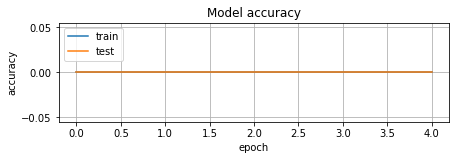

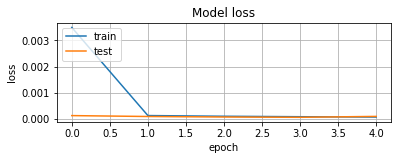

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [16]:
# Generate predictions
predictions = model.predict(X_test_norm)

In [17]:
mySubmission = sampleSabmission
mySubmission["Predicted"] = predictions

mySubmission.head()

filename = 'IvanPredictions_1.csv'

mySubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: IvanPredictions_1.csv
